seaborn 은 matplotlib과 비슷한 기능을 하지만 matplotlib에 비해 몇 가지 이점이 있다.<br>
1. seaborn에서만 제공되는 통계 기반 plot
2. 깔끔한 color 와 palette 기능
3. pandas 데이터프레임과 높은 호환성
: hue 옵션으로 bar 구분이 가능하며, xtick,ytick,xlabel,ylabel, legend 등이 추가적인 코딩 작업 없이 자동으로 세팅된다.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 한글 폰트 적용
plt.rc('font',family='NanumBarunGothic')
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"]=(12,9)



실습 데이터는 seaborn에서 제공해주는 titanic dataset과 tips dataset 을 사용한다.


In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1. countplot
- 항목별 개수를 bar 형태로 그려주는 방식이다.
- 알아서 해당 칼럼을 구성하고 있는 value들을 구분하여 보여준다.


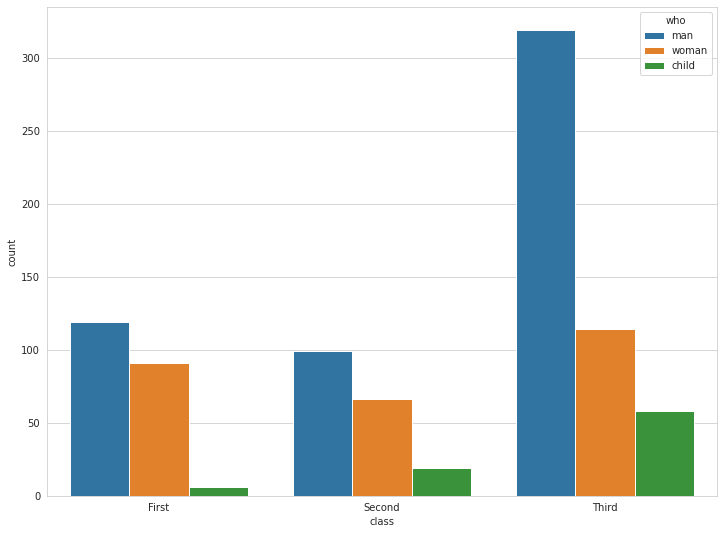

In [5]:
# 차트 배경 설정
sns.set_style('whitegrid')

# 차트 세로로 그리기
sns.countplot(x="class",hue="who",data=titanic)
plt.show()

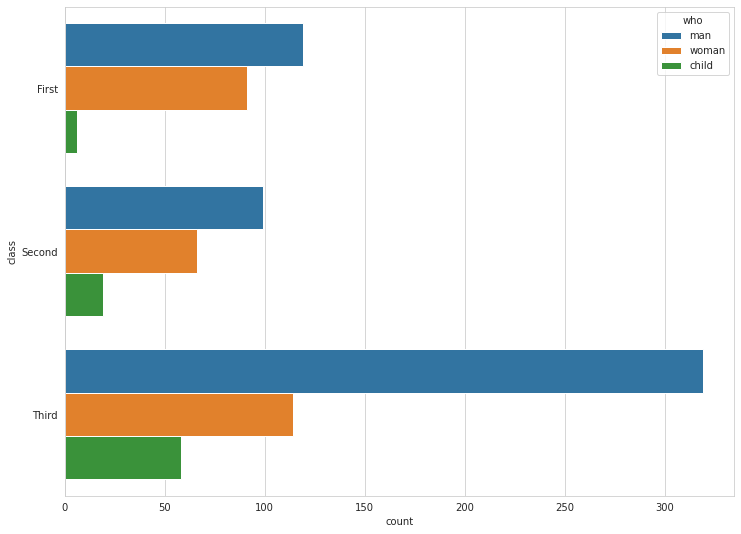

In [6]:
# 차트 가로로 그리기

sns.countplot(y="class",hue="who",data=titanic)
plt.show()

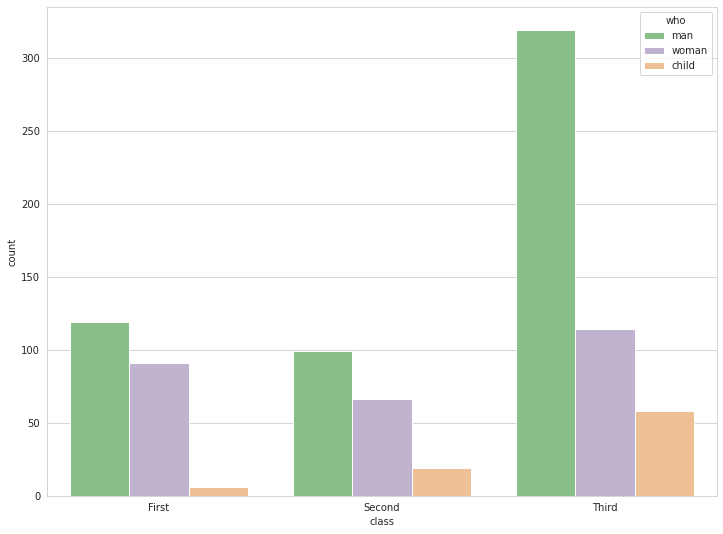

In [7]:
# palette 설정
sns.countplot(x="class",hue="who",palette='Accent',data=titanic)
plt.show()

2. distplot
- matplotlib의 hist 그래프와 kdeplot을 통합한 그래프이며, 분포와 밀도를 확인할 수 있다. 

In [8]:
x = np.random.randn(100)
x

array([ 0.54657947, -0.25684027, -0.5949461 ,  0.4886276 , -0.67569391,
        3.30258665, -0.07731357,  1.3523271 , -0.75827575, -0.27610094,
       -1.29776832, -0.70226257, -1.39872584, -0.99147578, -1.16148151,
       -0.50912747,  0.24404942,  2.43878378, -0.57070647,  0.08544429,
       -0.33715187,  0.33138556,  0.13069527, -1.04702802, -0.25128233,
        0.07343322, -2.45111515, -0.83137812,  2.37321352,  0.48620043,
       -1.42986327,  0.108698  , -1.09516668, -1.86084949, -1.16958451,
        1.34919708, -1.70242134,  0.07498979,  0.30127085,  0.01838373,
        0.27030348, -0.4402063 , -0.86505169,  0.62854273, -0.91095654,
        0.2008945 , -2.29204675, -0.85355163,  0.54311202, -0.25078278,
        1.24453216,  0.00982264, -2.80419355, -1.47065423, -0.57883216,
        0.33922746,  0.43402877,  2.6786499 , -0.49380237,  0.05790109,
       -1.25355025,  0.87562194, -0.35799602, -1.29596464,  1.18393636,
        0.29423637,  0.36945169,  0.345374  ,  0.30711568,  0.47

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


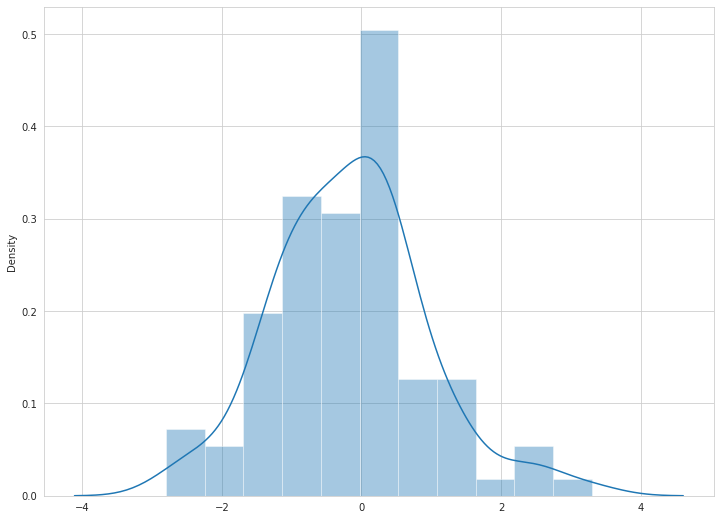

In [9]:
sns.distplot(x)
plt.show()

# rug, hist, kde 파라미터를 true, false 로 하여 바꿔 그릴 수 있다.

3. heatmap
- 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지 위에 열분포 형태의 그래픽으로 출력 가능하다.

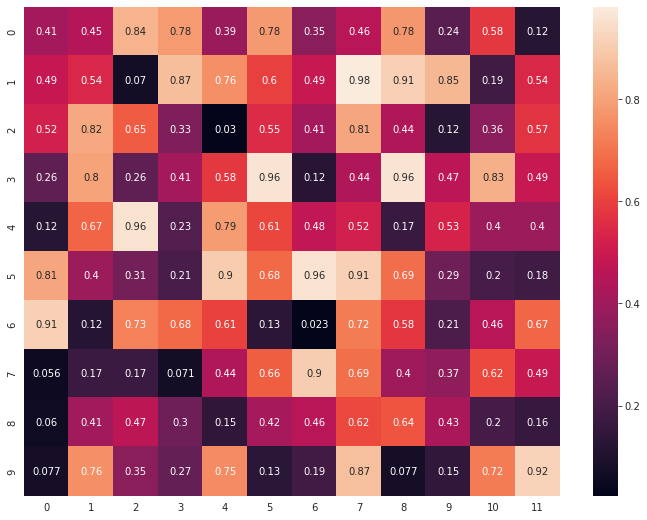

In [10]:
heatmap_data = np.random.rand(10,12)
sns.heatmap(heatmap_data, annot=True)
plt.show()

In [11]:
pivot = tips.pivot_table(index= 'day',columns='size',values='tip')
pivot

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


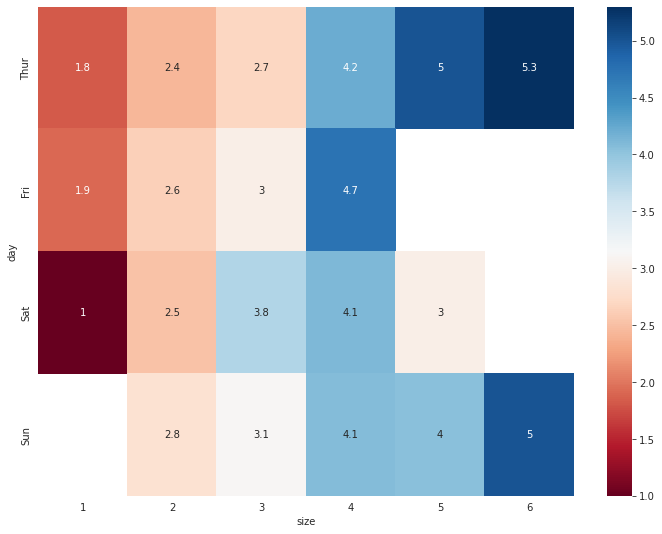

In [12]:
sns.heatmap(pivot,cmap='RdBu',annot=True)
plt.show()

특히 상관관계를 표시할때 heatmap이 유용하게 쓰인다.


In [13]:
titanic.corr

# 이렇게 한 눈에 포기 어려운 것들은

<bound method DataFrame.corr of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

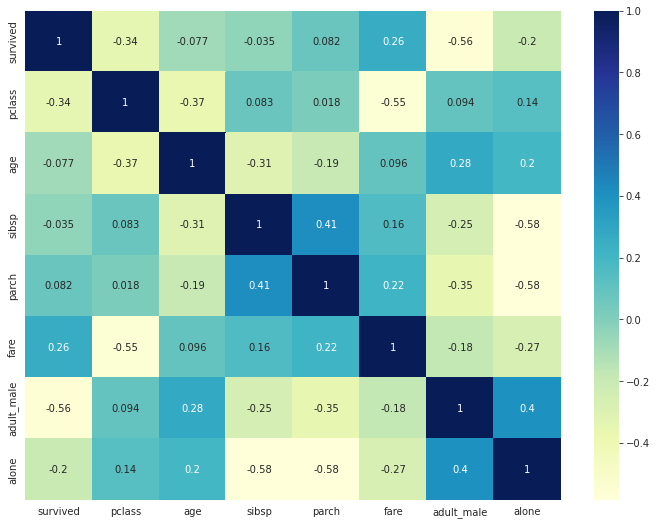

In [14]:
sns.heatmap(titanic.corr(),annot=True,cmap='YlGnBu')
plt.show()

4, pairplot
- 그리드 형태로 각 집합의 조합에 대해 히스토그램과 분포도를 그린다.
- 숫자형 columns에 대해서만 그린다.


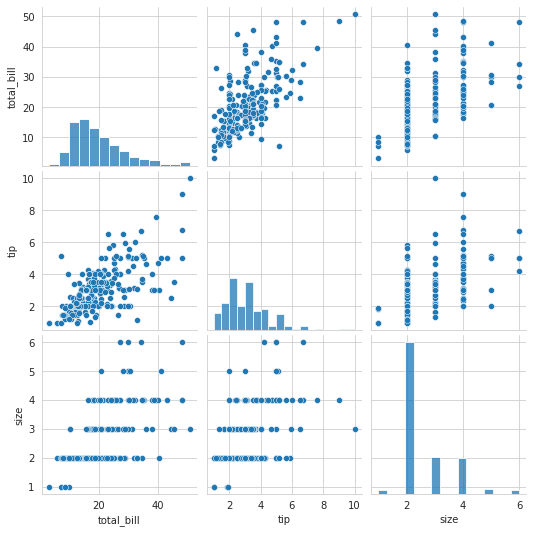

In [15]:
sns.pairplot(tips)
plt.show()

총 7개 변수 중에 숫자형 column인 'total_bill', 'tip', 'size' 끼리의 조합만 히스토그램과 분포도를 그린다.

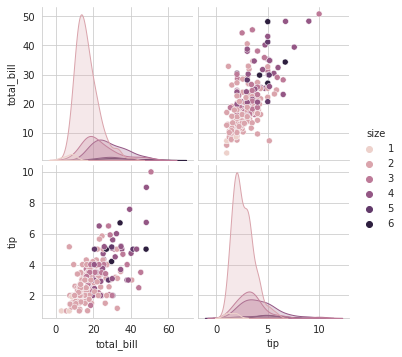

In [17]:
# 여기에 hue를 사용하면 하나의 칼럼을 기준으로 삼을 수도 있다.

sns.pairplot(tips,hue='size')
plt.show()

5. violinplot
- column에 대한 데이터의 비교 분포도를 확인할 수 있다.
- 곡선진 부분은 데이터의 분포를 나타낸다.
- 양쪽 끝 뾰족한 부분은 데이터의 최소값과 최대값을 나타낸다.


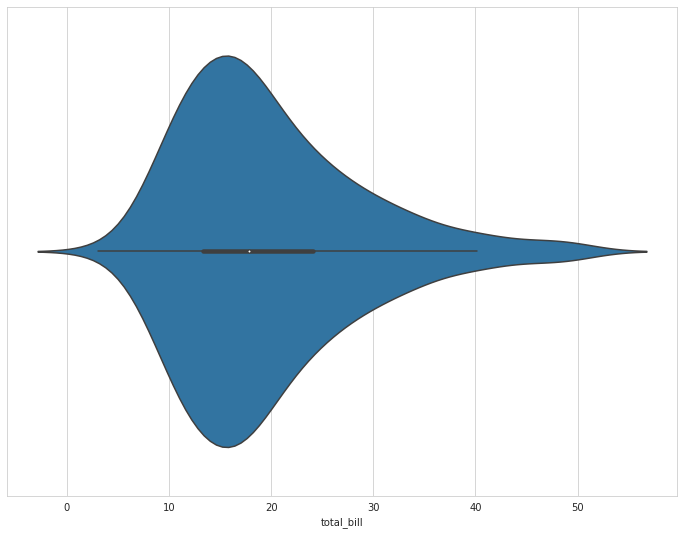

In [18]:
sns.violinplot(x=tips["total_bill"])
plt.show()

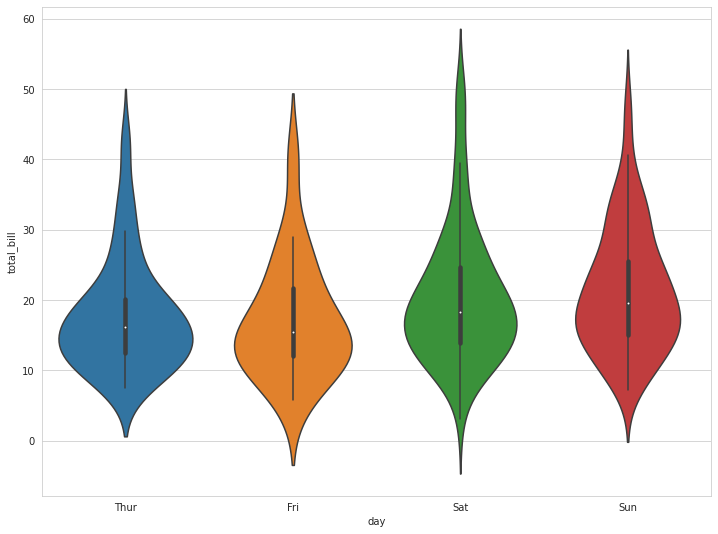

In [19]:
sns.violinplot(x="day",y="total_bill",data=tips)
plt.show()

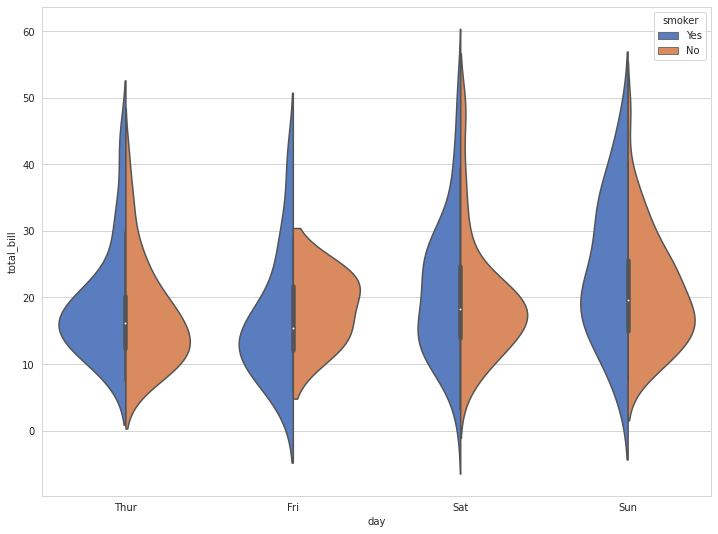

In [21]:
#split 옵션으로 바이올린을 합쳐서 볼 수 있다.
sns.violinplot(x="day",y="total_bill",hue="smoker",data=tips,palette="muted",split=True)
plt.show()

6. lmplot
- lmplot은 column 간의 선형관계를 확인하기에 용이한 차트이다.
- 또한 outlier도 같이 짐작해 볼 수 있다.


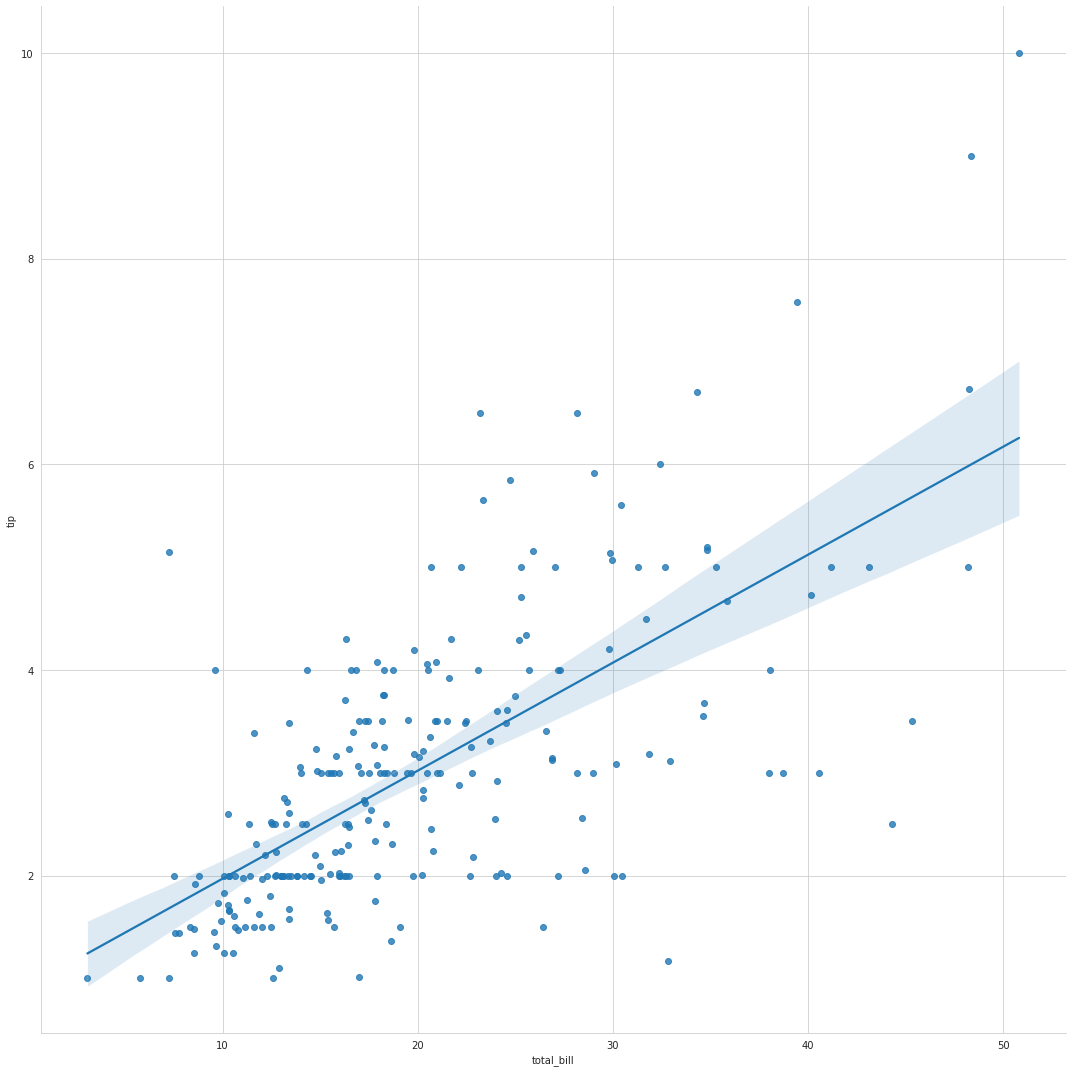

In [23]:
sns.lmplot(x="total_bill",y="tip",height=15,data=tips)
plt.show()

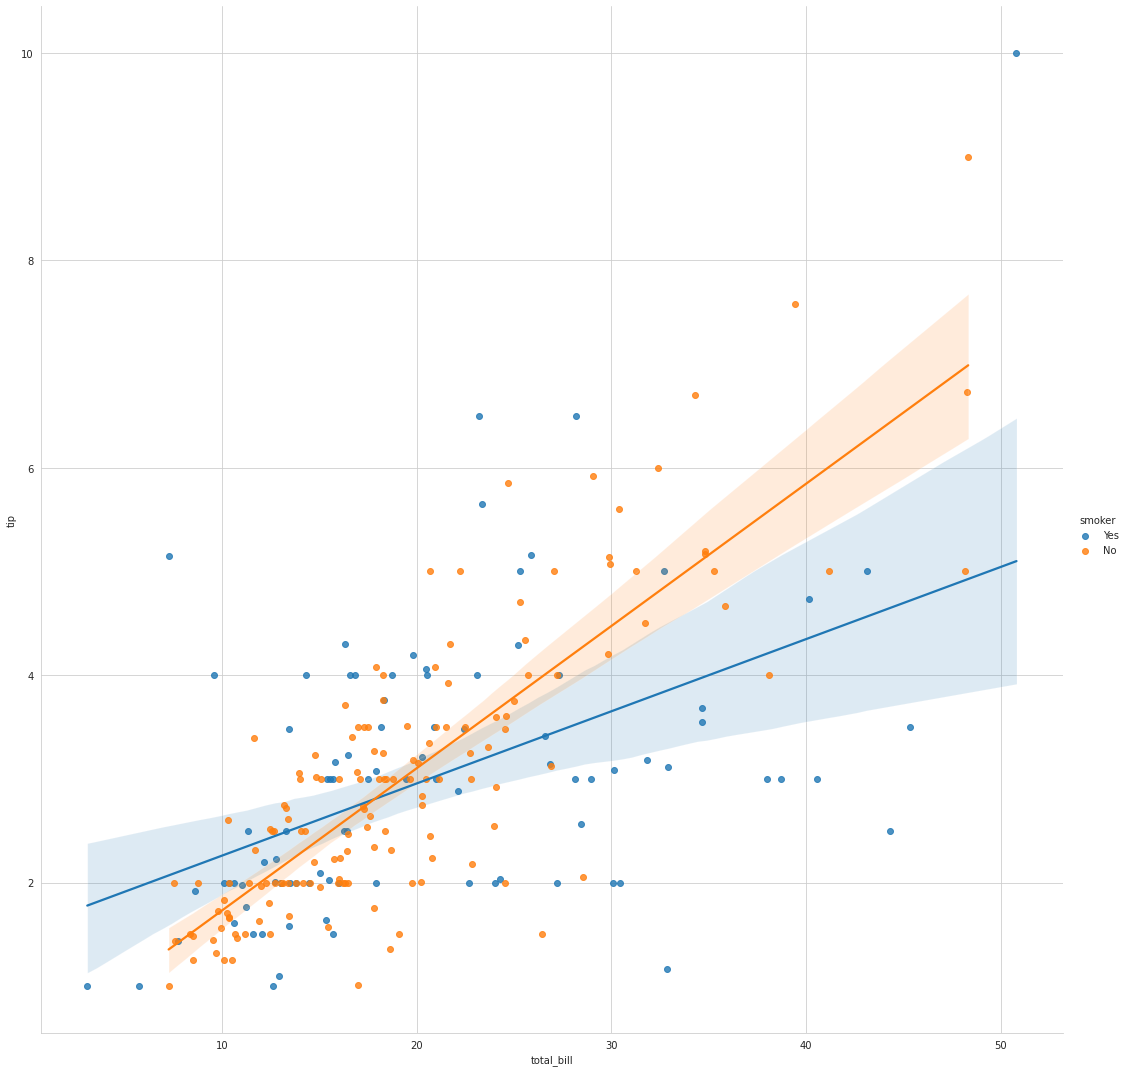

In [24]:
# hue 옵션으로 다중 선형관계를 그릴 수 있다.
sns.lmplot(x="total_bill",y="tip",hue="smoker",height=15,data=tips)
plt.show()

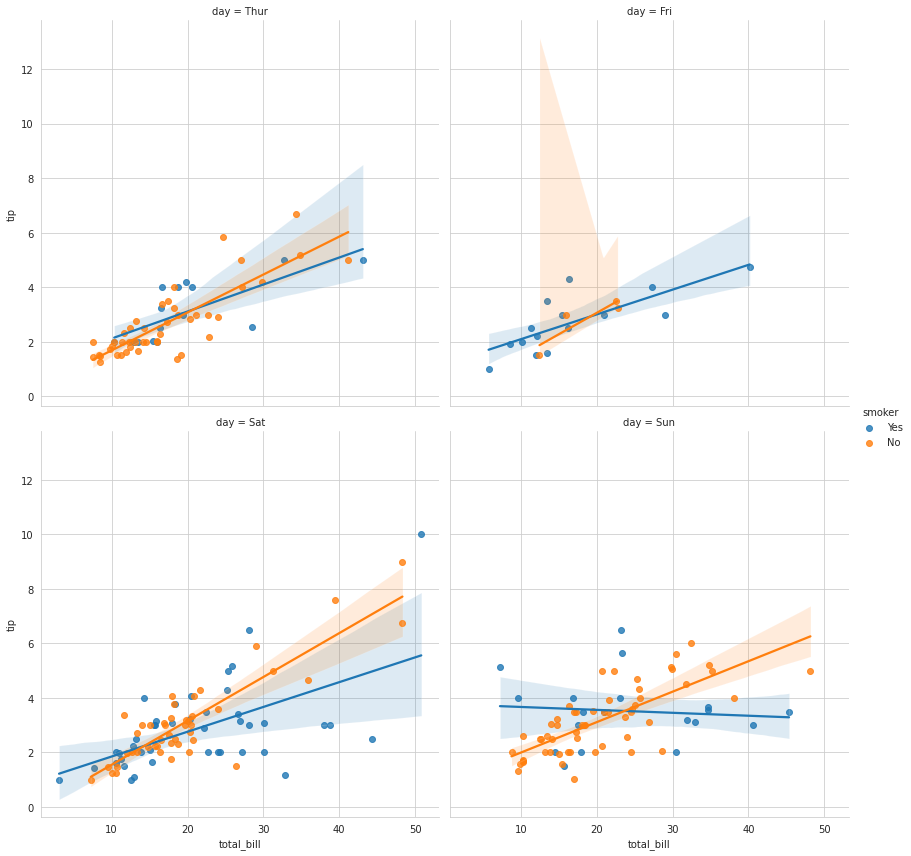

In [25]:
# col_wrap으로 한 줄에 표기할 column의 갯수를 명시할 수 있다.
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='day', col_wrap=2, height=6, data=tips)
plt.show()

7. replot
- 두 column간 상관관계를 보지만 lmplot처럼 선형관계를 따로 그려주지는 않는다.

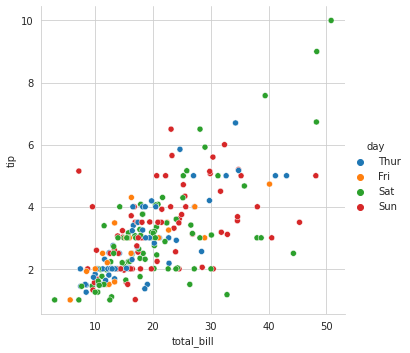

In [26]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)
plt.show()


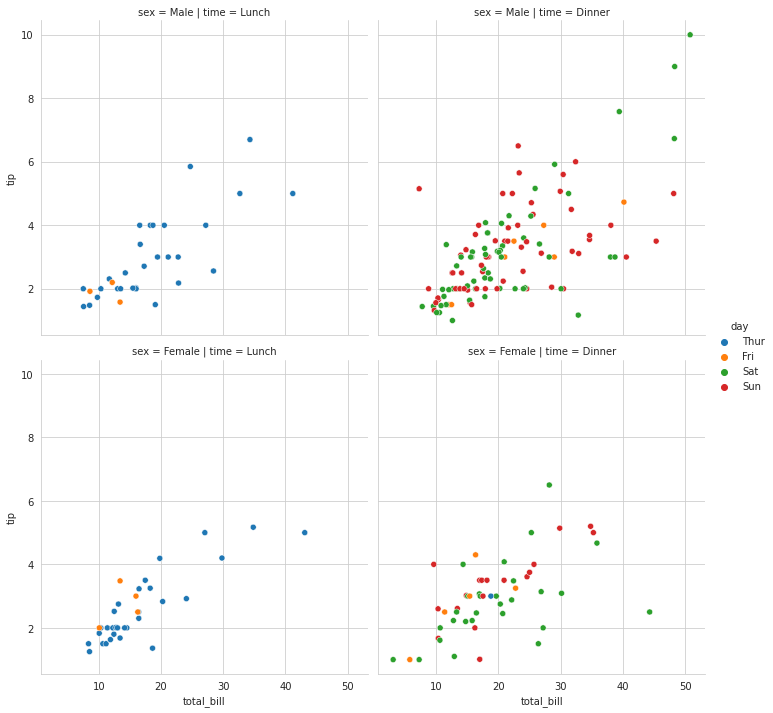

In [27]:
# row와 column에 표기할 데이터 column 선택하여 표현 가능
sns.relplot(x="total_bill", y="tip", hue="day", row="sex", col="time", data=tips)
plt.show()

8. jointplot
- scatter 와 histogram을 동시에 그려주며 숫자형 데이터만 표현 가능하다.

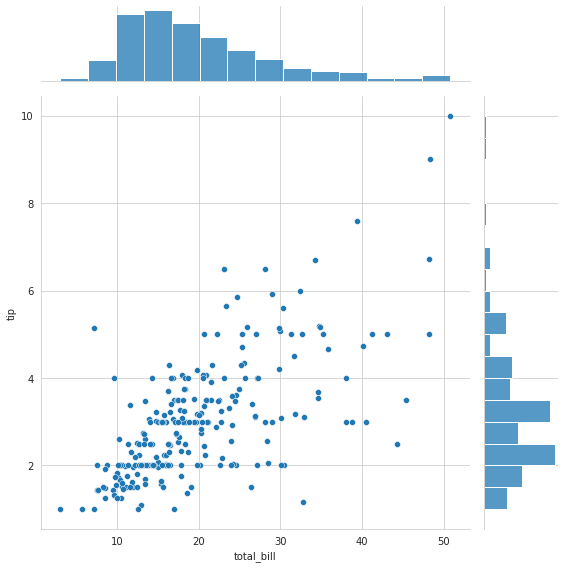

In [28]:
sns.jointplot(x="total_bill", y="tip", height=8, data=tips)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


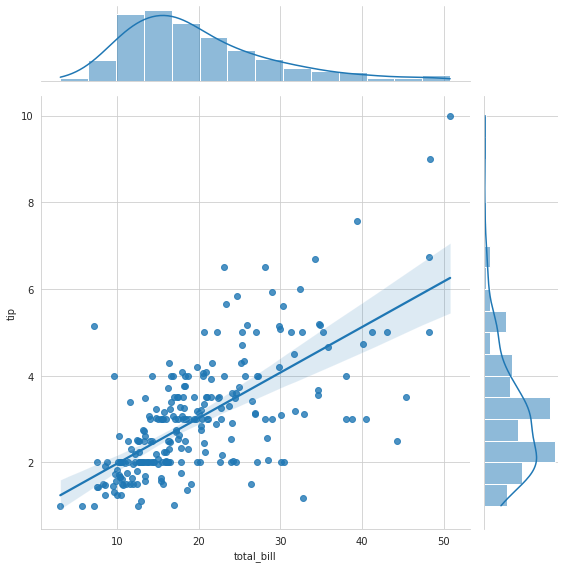

In [29]:
# 라인도 그릴 수가 있다.
# 옵션에 kind='reg'을 추가
sns.jointplot("total_bill", "tip", height=8, data=tips, kind="reg")
plt.show()